# Comparing Optimizers

This notebook explains about optimizers with comparing performance.

|Method|Formula|Reference|
|:--|:--|:--|
|SGD|$w_{t+1} = w_{t} - \alpha \nabla L_{t}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate and $\nabla L$ is the gradient of loss function|[【機械学習】Optimizer(最適化関数) – SGD、Momentum、AdaGrad、RMSProp、Adamとは何か](https://chefyushima.com/ai-ml_optimizer/2799/)|
|Momentum|$w_{t+1} = w_{t} + V_{t}$ <br> $V_{t} = \beta v_{t-1} - \alpha \nabla L_{t}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\beta$ is the coefficient of momentum and $\nabla L$ is the gradient of loss function <br> $V_{0}=0.0$|[【機械学習】Optimizer(最適化関数) – SGD、Momentum、AdaGrad、RMSProp、Adamとは何か](https://chefyushima.com/ai-ml_optimizer/2799/)|
|Adagrad|$w_{t+1} = w_{t} - \frac{\alpha \nabla L_{t}}{\sqrt{h_{t} + \theta}}$ <br> $h_{t} = h_{t-1} + (\nabla L_{t})^{2}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\nabla L$ is the gradient of the loss function and $\theta$ is the hyperparameter to avoid zero-divide <br> $h_{0}=0.0$|[【機械学習】Optimizer(最適化関数) – SGD、Momentum、AdaGrad、RMSProp、Adamとは何か](https://chefyushima.com/ai-ml_optimizer/2799/)|
|RMSprop|$w_{t+1} = w_{t} - \frac{\alpha \nabla L_{t}}{\sqrt{h_{t} + \theta}}$ <br> $h_{t} = \beta h_{t-1} + (1-\beta)(\nabla L_{t})^{2}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\nabla L$ is the gradient of the loss function, $\theta$ is the hyperparameter to avoid zero-divide, $\beta$ is the hyperparameter to set the balance between $h_{t-1}$ and $(\nabla L)^{2}$ <br> $h_{0}=0.0$|[【機械学習】Optimizer(最適化関数) – SGD、Momentum、AdaGrad、RMSProp、Adamとは何か](https://chefyushima.com/ai-ml_optimizer/2799/)|
|Adadelta|$w_{t+1} = w_{t} - \frac{\alpha}{RMS[\nabla L]_{t}} \nabla L_{t}$ <br> $RMS[\nabla L]_{t} = \sqrt{E[\nabla L_{t}^{2}] + \epsilon}$ <br> $E[\nabla L_{t}^{2}] = \rho E[\nabla L_{t-1}^{2}] + (1 - \rho) \nabla L_{t}^{2}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\nabla L$ is the gradient of the loss function, $E[\bullet]$ is the expected value, $\rho$ is the decay constant, $\epsilon$ is the hyperparameter to avoid zero-divide|[ADADELTA: An Adaptive Learning Rate Method](https://arxiv.org/abs/1212.5701)|
|Adam|$w_{t+1} = w_{t} - \alpha \frac{v_{t}}{\sqrt{s_{t}} + \theta}$ <br> $v_{t} = \beta_{1} v_{t-1} + (1 - \beta_{1}) \nabla L_{t}$ <br> $s_{t} = \beta_{2} s_{t-1} + (1 - \beta_{2})(\nabla L_{t})^{2}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\nabla L$ is the gradient of the loss function, $v_{t}$ is the Momentum method and $s_{t}$ is the RMSprop mothod|[【機械学習】Optimizer(最適化関数) – SGD、Momentum、AdaGrad、RMSProp、Adamとは何か](https://chefyushima.com/ai-ml_optimizer/2799/)|
|AdamW|$w_{t+1} = w_{t+1} - \alpha \frac{v_{t}}{\sqrt{s_{t}} + \theta}$ <br> $w_{t+1} = w_{t} - \alpha \lambda w_{t}$ <br> $v_{t} = \beta_{1} v_{t-1} + (1 - \beta_{1}) \nabla L_{t}$ <br> $s_{t} = \beta_{2} s_{t-1} + (1 - \beta_{2})(\nabla L_{t})^{2}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\lambda$ is the weight decay, $\nabla L$ is the gradient of the loss function, $v_{t}$ is the Momentum method and $s_{t}$ is the RMSprop mothod|[【機械学習】Optimizer(最適化関数) – SGD、Momentum、AdaGrad、RMSProp、Adamとは何か](https://chefyushima.com/ai-ml_optimizer/2799/)|
|Adan|$w_{t+1} = (1 + \lambda_{t} \alpha)^{-1}[w_{t} - \alpha_{t} \circ (m_{t} + (1 - \beta_{2}) v_{t})]$ <br> $\alpha_{t} = \frac{\alpha}{\sqrt{n_{t}} + \epsilon}$ <br> $n_{t} = (1 - \beta_{3}) n_{t-1} + \beta_{3} [\nabla L_{t} + (1 - \beta_{2})(\nabla L_{t} - \nabla L_{t-1})]^{2}$ <br> $v_{k} = (1 - \beta_{2}) v_{t-1} + \beta_{2} (\nabla L_{t} - \nabla L_{t-1})$ <br> $m_{t} = (1 - \beta_{1}) m_{t-1} + \beta_{1} \nabla L_{t}$ <br> where $w$ is the paramter, $t$ is the time, $\alpha$ is the learning rate, $\nabla L$ is the gradient of the loss function, $\beta_{1},\beta_{2},\beta_{3}$ are parameters of momentum, $\epsilon$ is the hyperparameter to avoid zero-divide and $\lambda$ is the weight decay|[Adan: Adaptive Nesterov Momentum Algorithm for Faster Optimizing Deep Models](https://arxiv.org/abs/2208.06677)|

# Result of Measuring Performance

In [1]:
import pickle
import optuna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = [
    'result_samples/014-2_ImageClassification-CIFAR100-SimpleCNN-SGD-PyTorch/study.pkl',
    'result_samples/014-6_ImageClassification-CIFAR100-SimpleCNN-Adadelta-PyTorch/study.pkl',
    'result_samples/014-3_ImageClassification-CIFAR100-SimpleCNN-Momentum-PyTorch/study.pkl',
    'result_samples/014-7_ImageClassification-CIFAR100-SimpleCNN-Adam-PyTorch/study.pkl',
    'result_samples/014-4_ImageClassification-CIFAR100-SimpleCNN-Adagrad-PyTorch/study.pkl',
    'result_samples/014-8_ImageClassification-CIFAR100-SimpleCNN-AdamW-PyTorch/study.pkl',
    'result_samples/014-5_ImageClassification-CIFAR100-SimpleCNN-RMSProp-PyTorch/study.pkl',
]

In [3]:
train_accuracy = {}
test_accuracy = {}
for result in results:
    with open(result, 'rb') as f:
        study = pickle.load(f)

    key = result.split('/')[1].split('-')[4]
    train_accuracy[key] = []
    test_accuracy[key] = []

    for trial in study.trials:
        train_accuracy[key].append(trial.user_attrs['train_accuracy'])
        test_accuracy[key].append(trial.user_attrs['test_accuracy'])

df_train_accuracy = pd.DataFrame(train_accuracy)
df_test_accuracy = pd.DataFrame(test_accuracy)

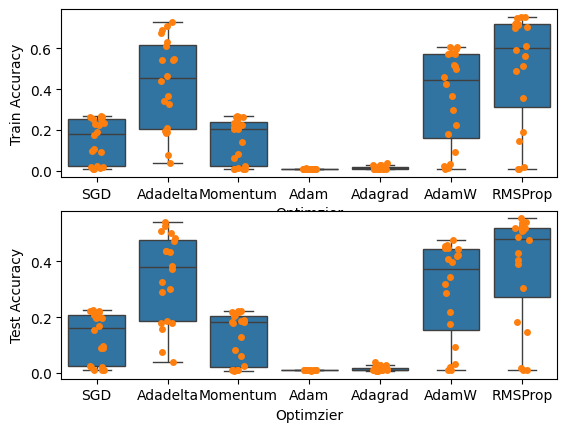

In [4]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
df_melt_train = pd.melt(df_train_accuracy, var_name='Optimzier', value_name='Train Accuracy')
sns.boxplot(x='Optimzier', y='Train Accuracy', data=df_melt_train, showfliers=False, ax=ax)
sns.stripplot(x='Optimzier', y='Train Accuracy', data=df_melt_train, jitter=True, ax=ax)

ax = fig.add_subplot(2, 1, 2)
df_melt_test = pd.melt(df_test_accuracy, var_name='Optimzier', value_name='Test Accuracy')
sns.boxplot(x='Optimzier', y='Test Accuracy', data=df_melt_test, showfliers=False, ax=ax)
sns.stripplot(x='Optimzier', y='Test Accuracy', data=df_melt_test, jitter=True, ax=ax)

plt.show()